In [8]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
# warnings.filterwarnings('ignore')

In [9]:
D, D_r = 3, 2048
d = int(D_r/2)
save_folder = f'../data/good-linear-saturated/linear'
Lyapunov_time, dt = 1./.91, 0.02
error_threshold = 0.05
beta = 4e-5
L0, L1 = 0.4, 3.5
percents = 50
n_repeats = 500
n_models = percents * n_repeats
row_selection = 'good_50_50'
train_option = 'random_20000'
repo = '..'
L63_data_folder = '{}/data/L63-trajectories'.format(repo)
train = np.load('{}/train.npy'.format(L63_data_folder))
test = np.load('{}/test.npy'.format(L63_data_folder))
limits_W_in, limits_W = [-0.1, 0.1], [-.5, .5]

batch = sr1.BatchStrategy_SMLR(save_folder, D, D_r, n_repeats, beta, error_threshold, train, test, dt, Lyapunov_time, L0, L1, percents,\
                          row_selection, train_option, limits_W_in, limits_W)
# batch.run_single_partition([d, d, 0], length=1374, save_data=True, batch_size=50)
# bsa = sr1.BatchStrategyAnalyzer_SMLR(batch.save_folder)
# bsa.compute_train_loss(train)
# bsa.compute_test_loss_single(test)

In [11]:
save_folder = f'../data/good-linear-saturated/linear'
batch = sr1.BatchStrategy_SMLR(save_folder, D, D_r, n_repeats, beta, error_threshold, train, test, dt, Lyapunov_time, L0, L1, percents,\
                          row_selection, train_option, limits_W_in, limits_W)
# batch.run_single_partition([d, d, 0], length=1374, save_data=True, batch_size=50)
bsa = sr1.BatchStrategyAnalyzer_SMLR(batch.save_folder)
# bsa.compute_train_loss(train)
# bsa.compute_test_loss_single(test)

Working on batch 0 ...
Time taken by sample_parallel is 0.7099 seconds
Running experiments ...
Documenting results ...
Working on batch 1 ...
Time taken by sample_parallel is 0.7304 seconds
Running experiments ...
Documenting results ...
Working on batch 2 ...
Time taken by sample_parallel is 0.7490 seconds
Running experiments ...
Documenting results ...
Working on batch 3 ...
Time taken by sample_parallel is 0.7625 seconds
Running experiments ...
Documenting results ...
Working on batch 4 ...
Time taken by sample_parallel is 0.7462 seconds
Running experiments ...
Documenting results ...
Working on batch 5 ...
Time taken by sample_parallel is 0.7426 seconds
Running experiments ...
Documenting results ...
Working on batch 6 ...
Time taken by sample_parallel is 0.7776 seconds
Running experiments ...
Documenting results ...
Working on batch 7 ...
Time taken by sample_parallel is 0.7629 seconds
Running experiments ...
Documenting results ...
Working on batch 8 ...
Time taken by sample_para

In [ ]:
save_folder = f'../data/good-linear-saturated/good'
batch = sr1.BatchStrategy_SMLR(save_folder, D, d, n_repeats, beta, error_threshold, train, test, dt, Lyapunov_time, L0, L1, percents,\
                          row_selection, train_option, limits_W_in, limits_W)
# batch.run_single_partition([d, 0, 0], length=1374, save_data=True, batch_size=500)
bsa = sr1.BatchStrategyAnalyzer_SMLR(batch.save_folder)
# bsa.compute_train_loss(train)
# bsa.compute_test_loss_single(test)

In [ ]:
save_folder = f'../data/standard-multi-valid'
batch = sr1.BatchStrategy_SMLR(save_folder, D, 300, 500, beta, error_threshold, train, test[:500], dt, Lyapunov_time, L0, L1, percents,\
                          row_selection, train_option, limits_W_in, limits_W)
batch.run_single_partition_multi_valid([300, 0, 0], length=1374, save_data=True, batch_size=500)
bsa = sr1.BatchStrategyAnalyzer_SMLR(batch.save_folder)
bsa.compute_train_loss(train)

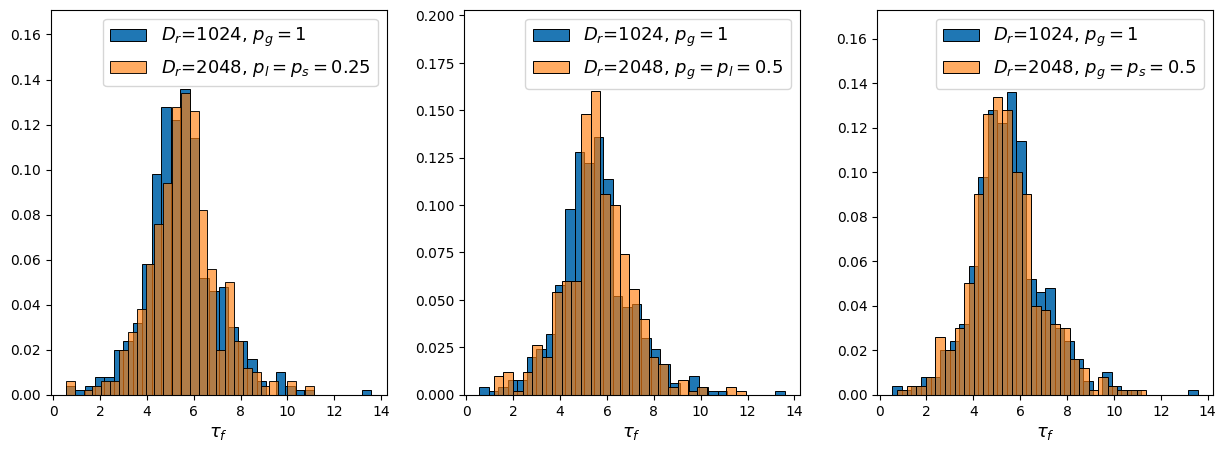

In [33]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(132)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(133)

# bsa_g = sr1.BatchStrategyAnalyzer_SMLR(f'../data/good-linear-saturated/good')
bsa_l = sr1.BatchStrategyAnalyzer_SMLR(f'../data/good-linear-saturated/linear')
bsa_s = sr1.BatchStrategyAnalyzer_SMLR(f'../data/good-linear-saturated/saturated')
bsa_1 = sr1.BatchStrategyAnalyzer_SMLR('../data/L63-Strategy-varying-featuresize/' + str(d))
bsa_2 = sr1.BatchStrategyAnalyzer_SMLR('../data/L63-Strategy-varying-featuresize/' + str(D_r))

# data_g = bsa_g.get_data()
data_l = bsa_l.get_data()
data_s = bsa_s.get_data()
data_1 = bsa_1.get_data()
data_2 = bsa_2.get_data()

data_1 = data_1[data_1['good_rows_W_in']==1]
data_2 = data_2[data_2['good_rows_W_in']==0.5]

sns.histplot(data_1['tau_f_se'], stat='probability', label=fr'$D_r$={d}, $p_g=1$', ax=ax, alpha=1.)
sns.histplot(data_l['tau_f_se'], stat='probability', label=fr'$D_r$={D_r}, $p_g=p_l=0.5$', ax=ax, alpha=0.65)

ax.set_xlabel(r'$\tau_f$', fontsize=13)
ax.set_ylabel(r'', fontsize=13)
ax.legend(fontsize=13)
ax1.set_ylim((0, 0.171))
# ax.set_title(r'One type of bad rows present for larger $D_r$')

sns.histplot(data_1['tau_f_se'], stat='probability', label=fr'$D_r$={d}, $p_g=1$', ax=ax1, alpha=1.)
sns.histplot(data_2['tau_f_se'], stat='probability', label=fr'$D_r$={D_r}, $p_l=p_s=0.25$', ax=ax1, alpha=0.65)
ax1.set_xlabel(r'$\tau_f$', fontsize=13)
ax1.set_ylabel(r'', fontsize=13)
ax1.legend(fontsize=13)
ax.set_ylim((0, 0.203))
# ax1.set_title(r'All types of rows for larger $D_r$')

sns.histplot(data_1['tau_f_se'], stat='probability', label=fr'$D_r$={d}, $p_g=1$', ax=ax2, alpha=1.)
sns.histplot(data_s['tau_f_se'], stat='probability', label=fr'$D_r$={D_r}, $p_g=p_s=0.5$', ax=ax2, alpha=0.65)
ax2.set_xlabel(r'$\tau_f$', fontsize=13)
ax2.set_ylabel(r'', fontsize=13)
ax2.legend(fontsize=13)
ax2.set_ylim((0, 0.173))
# ax2.set_title(r'Good and saturated rows for larger $D_r$')

fig.subplots_adjust(wspace=0.23)
plt.savefig('../data/plots/tau_f-gls.png', dpi=300, bbox_inches='tight')